# Kmeans Clustering with California Data

## 1. Import Data and Libraries
## 2. Create Subset with only numerical data
## 3. Clean Data
## 4. Elbow Technique
## 5. K-Means Clustering
## 6. Check Clustering Stats
## 7. Final Observations

## 1. Import Data and Libraries

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Display graphs without having to call

%matplotlib inline

In [3]:
path = r'/Users/bethanybreed/Documents/A Career Foundry/Gov Employ Data/02 Data'

In [4]:
# Import Data

df = pd.read_pickle(os.path.join(path,'prepared data','March 2022 clean-a.pkl'))

In [5]:
df.shape

(2152679, 25)

In [6]:
df.head()

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,...,years_of_service,age_level_code,occupation_family,occupation_code,agency,education_code,work_status_code,full_time_code,supervisor_code,state
0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,BACHELORS,NaN,15 - 19,PROGRAM MANAGEMENT,Administrative,ES-SENIOR EXECUTIVE SERVICE,0,...,18.8,6.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",2.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,13,1,1,2,DISTRICT OF COLUMBIA
1,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,55-59,POST-BACHELORS,NaN,25 - 29,GENERAL ATTORNEY,Professional,ES-SENIOR EXECUTIVE SERVICE,0,...,29.2,9.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,2,DISTRICT OF COLUMBIA
2,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,12.5,5.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,2,OKLAHOMA
3,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,10.5,5.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,8,DISTRICT OF COLUMBIA
4,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,POST-BACHELORS,13.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,...,13.4,6.0,LEGAL AND KINDRED,1.0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,15,1,1,8,DISTRICT OF COLUMBIA


### 2. Create Subset of only California with only numerical data

In [7]:
df_cali =  df[df['state']=='CALIFORNIA']

In [8]:
df_cali.head()

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,...,years_of_service,age_level_code,occupation_family,occupation_code,agency,education_code,work_status_code,full_time_code,supervisor_code,state
21,AMERICAN BATTLE MONUMENTS COMMISSION,United States,40-44,BACHELORS,13.0,10 - 14,HUMAN RESOURCES MANAGEMENT,Administrative,GS-GENERAL SCHEDULE,0,...,14.6,6.0,PERSONNEL MGMT & INDUSTRIAL RELATIONS,2.0,AMERICAN BATTLE MONUMENTS COMMISSION,13,1,1,8,CALIFORNIA
122,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,60-64,MASTERS,13.0,10 - 14,MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,GS-GENERAL SCHEDULE,0,...,10.0,10.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",2.0,DEPARTMENT OF THE AIR FORCE,17,1,1,8,CALIFORNIA
123,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,40-44,BACHELORS,13.0,5 - 9,MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,GS-GENERAL SCHEDULE,0,...,8.3,6.0,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",2.0,DEPARTMENT OF THE AIR FORCE,13,1,1,8,CALIFORNIA
129,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,65 or more,BETWEEN HS & BACHELORS,9.0,35 or more,TECHNICAL WRITING AND EDITING,Administrative,GS-GENERAL SCHEDULE,0,...,37.7,11.0,INFORMATION AND ARTS,2.0,DEPARTMENT OF THE AIR FORCE,10,1,1,8,CALIFORNIA
147,AIR FORCE OPERATIONAL TEST AND EVALUATION CENTER,United States,55-59,MASTERS,13.0,20 - 24,OPERATIONS RESEARCH,Professional,GS-GENERAL SCHEDULE,1,...,22.2,9.0,MATHEMATICS AND STATISTICS,1.0,DEPARTMENT OF THE AIR FORCE,17,1,1,8,CALIFORNIA


In [9]:
df_cali.shape

(141103, 25)

In [10]:
df_cali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141103 entries, 21 to 2155550
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sub_agency           141103 non-null  object 
 1   country              141103 non-null  object 
 2   age_level            141103 non-null  object 
 3   education_level      141103 non-null  object 
 4   pay_grade            89763 non-null   float64
 5   years_grouping       141103 non-null  object 
 6   occupation           141103 non-null  object 
 7   occupation_category  141103 non-null  object 
 8   pay_plan             141103 non-null  object 
 9   stem                 141103 non-null  int64  
 10  supervisor_status    141103 non-null  object 
 11  full_time            141103 non-null  object 
 12  work_status          141103 non-null  object 
 13  date                 141103 non-null  object 
 14  salary               140479 non-null  float64
 15  years_of_servic

In [11]:
columns = ['pay_grade','stem', 'salary', 'years_of_service','age_level_code','occupation_code', 'education_code', 'work_status_code', 'full_time_code', 'supervisor_code']

In [12]:
#Create subset

sub = df_cali[columns]

In [13]:
sub.head()

,pay_grade,stem,salary,years_of_service,age_level_code,occupation_code,education_code,work_status_code,full_time_code,supervisor_code
21,13.0,0,120618.0,14.6,6.0,2.0,13,1,1,8
122,13.0,0,130214.0,10.0,10.0,2.0,17,1,1,8
123,13.0,0,126597.0,8.3,6.0,2.0,13,1,1,8
129,9.0,0,81805.0,37.7,11.0,2.0,10,1,1,8
147,13.0,1,122980.0,22.2,9.0,1.0,17,1,1,8


In [14]:
sub.shape

(141103, 10)

### 3. Clean Data

In [15]:
# Check for missing values

sub.isnull().sum()

pay_grade           51340
stem                    0
salary                624
years_of_service        0
age_level_code          0
occupation_code         0
education_code          0
work_status_code        0
full_time_code          0
supervisor_code         0
dtype: int64

In [16]:
#Fix pay_grade NaN

In [17]:
paygrade_nan = sub[sub['pay_grade'].isnull() == True]

In [18]:
paygrade_nan

,pay_grade,stem,salary,years_of_service,age_level_code,occupation_code,education_code,work_status_code,full_time_code,supervisor_code
15831,NaN,0,93706.0,7.1,8.0,6.0,13,1,1,2
22517,NaN,0,83667.0,7.2,5.0,6.0,13,1,1,8
22553,NaN,0,98026.0,6.2,6.0,6.0,13,1,1,2
22559,NaN,0,74777.0,8.5,4.0,6.0,13,1,1,8
22638,NaN,0,99675.0,16.3,5.0,6.0,12,1,1,2
...,...,...,...,...,...,...,...,...,...,...
2155279,NaN,0,48940.0,6.7,7.0,6.0,8,1,1,8
2155281,NaN,1,151595.0,6.7,9.0,1.0,13,1,1,8
2155385,NaN,1,257480.0,5.9,9.0,1.0,15,1,1,8
2155479,NaN,1,95087.0,5.4,6.0,1.0,13,1,1,8


In [19]:
sub.pay_grade.mean()

9.875416374229916

In [20]:
sub.pay_grade.median()

11.0

In [21]:
sub.pay_grade.mode()

0    12.0
Name: pay_grade, dtype: float64

In [22]:
#replace pay_grade NaN values with median
sub['pay_grade'] = sub['pay_grade'].fillna(sub['pay_grade'].median())

/var/folders/rt/m2j4lb4d1jn3b18ck1_f2csm0000gn/T/ipykernel_33258/1276879238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['pay_grade'] = sub['pay_grade'].fillna(sub['pay_grade'].median())


In [23]:
sub.isnull().sum()

pay_grade             0
stem                  0
salary              624
years_of_service      0
age_level_code        0
occupation_code       0
education_code        0
work_status_code      0
full_time_code        0
supervisor_code       0
dtype: int64

In [24]:
# Fix salary NaN

In [25]:
salary_nan = sub[sub['salary'].isnull() == True]

In [26]:
salary_nan

,pay_grade,stem,salary,years_of_service,age_level_code,occupation_code,education_code,work_status_code,full_time_code,supervisor_code
25778,9.0,0,NaN,21.7,8.0,3.0,13,1,1,8
26307,13.0,1,NaN,12.7,7.0,1.0,17,1,1,4
28826,7.0,0,NaN,6.7,5.0,3.0,14,1,1,8
48901,12.0,0,NaN,7.1,9.0,2.0,4,1,1,8
144201,9.0,0,NaN,12.8,5.0,2.0,4,1,1,8
...,...,...,...,...,...,...,...,...,...,...
2141321,11.0,0,NaN,0.3,3.0,2.0,17,1,1,8
2143754,11.0,0,NaN,0.3,9.0,2.0,17,1,1,8
2145619,11.0,0,NaN,0.2,5.0,2.0,17,1,1,8
2145639,11.0,0,NaN,0.2,6.0,2.0,17,1,1,8


In [27]:
sub.salary.mean()

99131.12044504873

In [28]:
sub.salary.mode()

0    176300.0
Name: salary, dtype: float64

In [29]:
sub.salary.median()

91254.0

In [30]:
#replace pay_grade NaN values with median
sub['salary'] = sub['salary'].fillna(sub['salary'].mean())

/var/folders/rt/m2j4lb4d1jn3b18ck1_f2csm0000gn/T/ipykernel_33258/4293097397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['salary'] = sub['salary'].fillna(sub['salary'].mean())


In [31]:
sub.isnull().sum()

pay_grade           0
stem                0
salary              0
years_of_service    0
age_level_code      0
occupation_code     0
education_code      0
work_status_code    0
full_time_code      0
supervisor_code     0
dtype: int64

### Standardize Data

In [32]:
scaler = StandardScaler()

In [33]:
df2 = pd.DataFrame(scaler.fit_transform(sub), columns = columns)
df2.head()

,pay_grade,stem,salary,years_of_service,age_level_code,occupation_code,education_code,work_status_code,full_time_code,supervisor_code
0,1.111196,-0.655826,0.445933,0.270089,-0.369450,-0.278069,0.433442,-0.353057,-0.226558,0.382735
1,1.111196,-0.655826,0.645086,-0.182637,1.308403,-0.278069,1.193953,-0.353057,-0.226558,0.382735
2,1.111196,-0.655826,0.570020,-0.349948,-0.369450,-0.278069,0.433442,-0.353057,-0.226558,0.382735
3,-0.525680,-0.655826,-0.359582,2.543560,1.727866,-0.278069,-0.136942,-0.353057,-0.226558,0.382735
4,1.111196,1.524795,0.494954,1.018071,0.888940,-0.941270,1.193953,-0.353057,-0.226558,0.382735


### 4. Elbow Technique

In [34]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [35]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1411030.0000000002,
 -1110759.300224614,
 -935822.7277536944,
 -814347.1223766396,
 -723041.2661168126,
 -662703.2889289372,
 -609771.8897373334,
 -560074.343119035,
 -520430.28690997383]

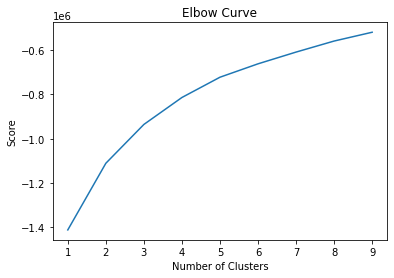

In [36]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  After standardizing the data and doing the elbow technique to find the curve, we can conclude that we should create 5 clusters as the slope decreases after 5

### 5. K-Means Clustering

In [37]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [38]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=5)

In [39]:
df2['clusters'] = kmeans.fit_predict(df2)

In [40]:
df2.head()

,pay_grade,stem,salary,years_of_service,age_level_code,occupation_code,education_code,work_status_code,full_time_code,supervisor_code,clusters
0,1.111196,-0.655826,0.445933,0.270089,-0.369450,-0.278069,0.433442,-0.353057,-0.226558,0.382735,1
1,1.111196,-0.655826,0.645086,-0.182637,1.308403,-0.278069,1.193953,-0.353057,-0.226558,0.382735,1
2,1.111196,-0.655826,0.570020,-0.349948,-0.369450,-0.278069,0.433442,-0.353057,-0.226558,0.382735,1
3,-0.525680,-0.655826,-0.359582,2.543560,1.727866,-0.278069,-0.136942,-0.353057,-0.226558,0.382735,1
4,1.111196,1.524795,0.494954,1.018071,0.888940,-0.941270,1.193953,-0.353057,-0.226558,0.382735,2


In [41]:
df2['clusters'].value_counts()

3    44562
1    39676
2    34305
0    15671
4     6889
Name: clusters, dtype: int64

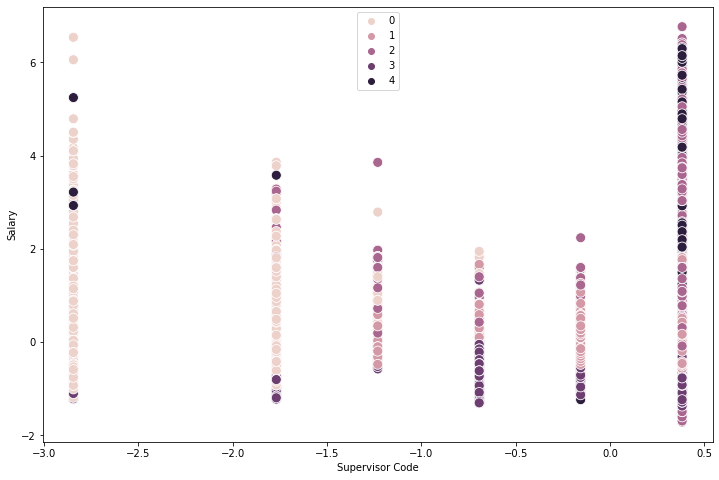

In [42]:
# Plot the clusters for the "supervisor_code" and "Salary" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['supervisor_code'], y=df2['salary'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Supervisor Code') # Label x-axis.
plt.ylabel('Salary') # Label y-axis.
plt.show()

## This visual compares Supervisor Status and Salary. These variables did not show a correlation in any other way, but by clustering the data, you can clearly see that  cluster 4 mostly includes A higher supervisor code and a higher salary, and cluster 1 tends to be the lower supervisor but a variety of salary.

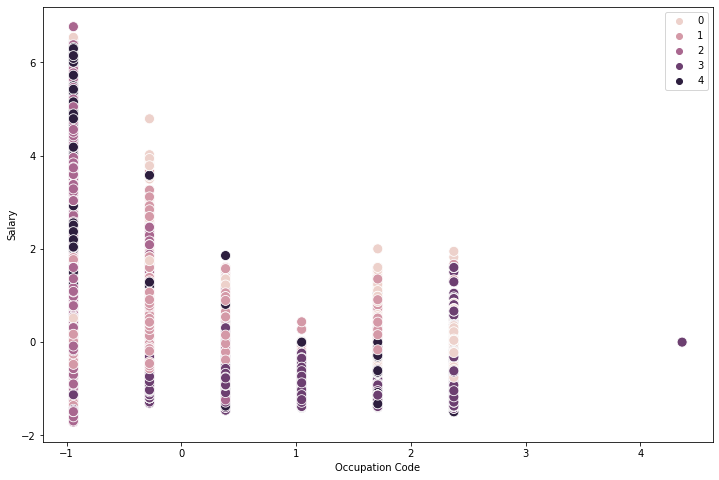

In [43]:
# Plot the clusters for the "occupation_code" and "Salary" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['occupation_code'], y=df2['salary'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Occupation Code') # Label x-axis.
plt.ylabel('Salary') # Label y-axis.
plt.show()

## This visual compares Occupation Code and Salary. These variables showed a negative correlation when checking variable relationships, but by clustering the data, you can clearly see that  cluster 4 and 1 are once again mostly separated out.

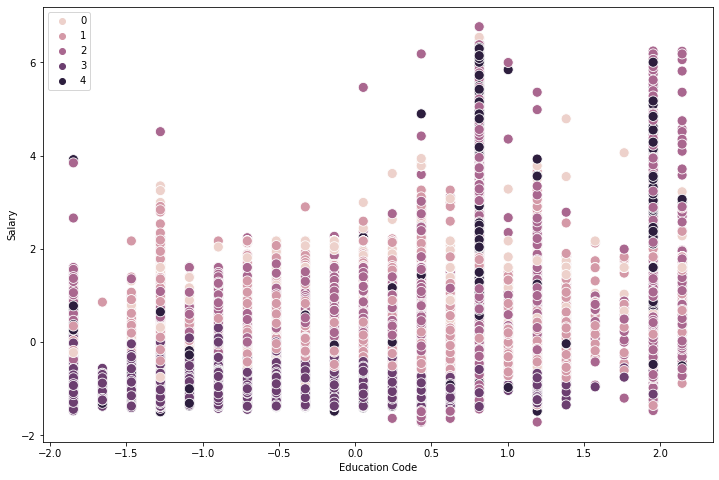

In [44]:
# Plot the clusters for the "education_code" and "Salary" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['education_code'], y=df2['salary'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Education Code') # Label x-axis.
plt.ylabel('Salary') # Label y-axis.
plt.show()

## This visual compares Education Code and Salary. These variables did not show a  correlation when checking variable relationships, and by clustering the data it is still hard to see any clear realtionships.  You can see darker colors are generally placed toward a higher education level and salary, but it's not a guarantee.  Also a lower salary and education level are not necessarily connected either.  You would think that the higher the level of education you have, especially a masters degree would show a guaranteed higher salary.

### 6. Check Clustering Stats

In [45]:
df2.loc[df2['clusters'] == 4, 'cluster'] = 'black'
df2.loc[df2['clusters'] == 3, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'pink'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'cream'

In [46]:
df2.groupby('cluster').agg({'age_level_code':['mean', 'median'],
                            'education_code':['mean', 'median'],
                            'full_time_code':['mean', 'median'],
                            'occupation_code':['mean', 'median'],
                            'pay_grade':['mean', 'median'], 
                            'salary':['mean', 'median'],
                            'stem':['mean', 'median'], 
                            'supervisor_code':['mean', 'median'],
                            'work_status_code':['mean', 'median'],
                            'years_of_service':['mean', 'median']})

age_level_code           education_code           full_time_code  \
                      mean    median           mean    median           mean   
cluster                                                                        
black             0.155777  0.050013      -0.042996  0.433442       4.413883   
cream             0.310160  0.469477       0.136997  0.433442      -0.226558   
dark purple      -0.235597 -0.369450      -0.760773 -1.277709      -0.226558   
pink              0.205806  0.050013       0.222162  0.433442      -0.226558   
purple           -0.104957  0.050013       0.677347  0.433442      -0.226558   

                      occupation_code           pay_grade              salary  \
               median            mean    median      mean    median      mean   
cluster                                                                         
black        4.413883        0.061185 -0.278069 -0.513800  0.292758  0.299261   
cream       -0.226558       -0.071715 -0.278069  0.649907  0.292758  0.515933   
dark purple -0.226558        0.967432  0.385133 -0.912887 -1.344118 -0.832708   
pink        -0.226558       -0.340367 -0.278069  0.450253  0.292758  0.156386   
purple      -0.226558       -0.842558 -0.941270  0.471380  0.292758  0.605030   

                           stem           supervisor_code            \
               median      mean    median            mean    median   
cluster                                                               
black       -0.477256  0.293151 -0.655826        0.310292  0.382735   
cream        0.488624 -0.172279 -0.655826       -2.725041 -2.843950   
dark purple -0.862923 -0.575084 -0.655826        0.322551  0.382735   
pink         0.025940 -0.655111 -0.655826        0.365683  0.382735   
purple       0.445311  1.524541  1.524795        0.340596  0.382735   

            work_status_code           years_of_service            
                        mean    median             mean    median  
cluster                                                            
black               2.832403  2.832403        -0.405095 -0.733781  
cream              -0.269716 -0.353057         0.597254  0.466926  
dark purple        -0.055613 -0.353057        -0.314345 -0.645205  
pink               -0.168157 -0.353057         0.233853  0.073252  
purple             -0.178857 -0.353057        -0.053618 -0.349948

## 7. Final Observations

## Seeing the final breakdown of each category does make it hard for me to understand as I had to scale the data.  I can't see the median salary amount in each category as it was scaled.  You can still see the comparison of each category though. The numbers are fairly all over the place.  None of them have a clear "highest value of each category" same with none of them have the lowest.  Although the data has been narrowed down to a state, with no clear correlation between variables it is hard to even find clusters for them.  You would hope that things such as salary, eduction level, years of service, supervisor would all help create clusters but this is still showing to not be true.

## Export Data for Tableau

In [48]:
df2.to_csv(os.path.join(path,'prepared data','March 2022 clean-cali.csv'))